BULDINGING AN IMAGE CLASSIFICATION MODEL USING CNN neural network .


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

1. Loading the data

In [4]:
x = np.load("X_data.npy")
y = np.load("Y_data.npy")
print(x.shape," | ", y.shape)

(1298, 32, 32, 3)  |  (1298,)


2. Testing the sample image 
   

NOTE:- Apple - 0 | Banana - 1 | Guava - 2

y -> 1189 



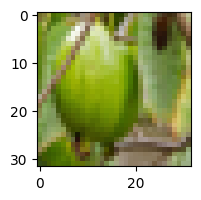

In [19]:
def sample_plot(index: int)-> None:
    
    plt.figure(figsize = (2,2))
    plt.imshow(x[index])
    print("y -> {} \n".format(index))
    
sample_plot(1189)

3. Let's split the data for training and testing

In [20]:
Y = y.reshape(-1,1) # To perform training we should have to reshape the y lable from 1d to 2d.

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.20, random_state = 2024)

4. Check the sizes using 'len()'

In [39]:
print(len(x_train), len(y_train), len(x_test), len(y_test))

1038 1038 260 260


5. Building an CNN model 

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, MaxPooling2D, Dense, Conv2D

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import softmax, relu

In [34]:
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [35]:
model = Sequential([
        
    Conv2D(filters = 64, kernel_size = (3,3), activation = relu, input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(filters = 32, kernel_size = (3,3), activation = relu),
    MaxPooling2D((2,2)),
    
    
    Flatten(),
    Dense(32, activation = relu),
    Dense(16, activation = relu),
    Dense(3, activation = softmax),
])

In [40]:
model.compile(
                optimizer = 'adam',
                loss = sparse_categorical_crossentropy,
                metrics = ['accuracy']
)

In [41]:
model.fit(x = x_train, y = y_train ,epochs = 20)

Epoch 1/20
33/33 [==============================] - 2s 30ms/step - loss: 3.3327 - accuracy: 0.5597
Epoch 2/20
33/33 [==============================] - 1s 21ms/step - loss: 0.4887 - accuracy: 0.7765
Epoch 3/20
33/33 [==============================] - 1s 21ms/step - loss: 0.2956 - accuracy: 0.8757
Epoch 4/20
33/33 [==============================] - 1s 25ms/step - loss: 0.1870 - accuracy: 0.9306
Epoch 5/20
33/33 [==============================] - 1s 26ms/step - loss: 0.1670 - accuracy: 0.9364
Epoch 6/20
33/33 [==============================] - 1s 24ms/step - loss: 0.0785 - accuracy: 0.9759
Epoch 7/20
33/33 [==============================] - 1s 18ms/step - loss: 0.1073 - accuracy: 0.9615
Epoch 8/20
33/33 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.9923
Epoch 9/20
33/33 [==============================] - 0s 13ms/step - loss: 0.0682 - accuracy: 0.9711
Epoch 10/20
33/33 [==============================] - 1s 16ms/step - loss: 0.0193 - accuracy: 0.9961
Epoch 11/

6. Evaluating the model performance

In [51]:
loss, accuracy = model.evaluate(x_test,y_test)

print(f"\nLOSS - {loss} | ACCURACY - {accuracy}\n")

9/9 [==============================] - 0s 26ms/step - loss: 0.0062 - accuracy: 0.9962

LOSS - 0.006185876205563545 | ACCURACY - 0.9961538314819336



7. Confusion matrix to depict results

In [67]:
y_pred = model.predict(x_test)

y_pred_actual = [ np.argmax(i) for i in y_pred ] 

y_test_actual = y_test.reshape(-1,)

9/9 [==============================] - 0s 6ms/step


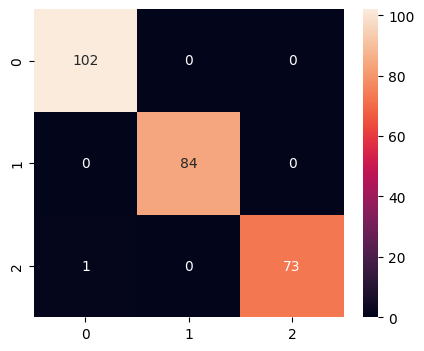

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_actual, y_pred_actual)

plt.figure( figsize = (5,4) )
sns.heatmap( cm, annot=True, fmt = '' )
plt.show()

8. Save the model for further use

In [106]:
model.save("apple_banana_guava_classification")

9. Conclusion


 GUAVA 



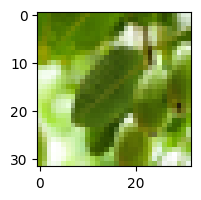

In [120]:
# Lets see the test data images and  there classified names

fruits = ['APPLE', 'BANANA', 'GUAVA']

def show(index): # index should be >>>   0 >= index < 260  cause the length of the test data is 260.
     
    print('\n',fruits[ y_pred_actual[index] ],'\n')
    
    plt.figure(figsize = (2,2) )
    plt.imshow(x_test[index])

show(220)    


 APPLE 



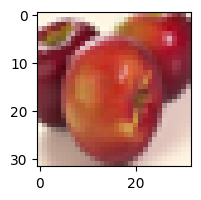

In [119]:
show(40)

10. Inference

At the end of the model training using train_data and evaluation using test_data we can make an cessation outcomes are so accurate with an 
good score by the way the size of the data set is petite around 1300 records.

We will be elucidate the results by taking look on confusion matrix how the model is performed robustly.

# Thanks to data augmentation 
